In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
#Upload the data file
df = pd.read_csv(r"D:\data analyst project\Diwali project\Diwali Sales Data.csv", encoding= 'unicode_escape')
#to avoide encoding error, use 'unicode_escape'

In [14]:
df.shape

(11251, 15)

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [18]:
#drop empty column
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [20]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [21]:
#drop null values
df.dropna(inplace=True)

In [23]:
#change data type
df['Amount'] = df['Amount'].astype('int')

In [25]:
df['Amount'].dtypes

dtype('int32')

In [31]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

<AxesSubplot:xlabel='count', ylabel='Gender'>

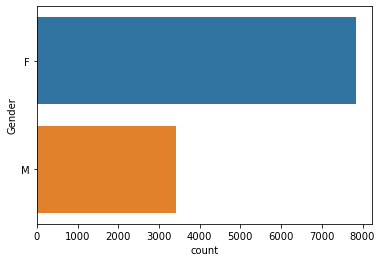

In [44]:
#Count of gender
sns.countplot(y = 'Gender', data = df)

<AxesSubplot:xlabel='Amount', ylabel='Gender'>

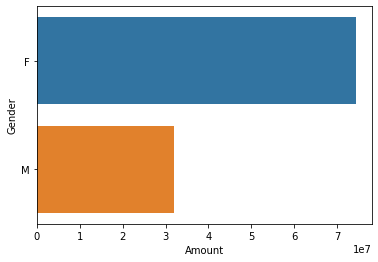

In [47]:
#Sum of amount spent by Gender
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(y = 'Gender', x = 'Amount', data = sales_gen )

*From above graphs we can see that most of the buyers are female and even purchasing amount of female is greater than male*

## Age

<AxesSubplot:xlabel='Age Group', ylabel='count'>

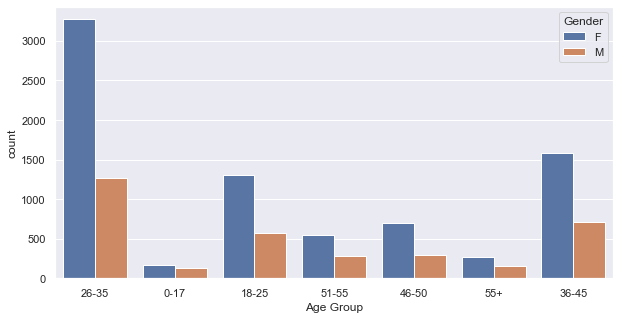

In [69]:
#Count of purchases done wrt age group
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x = 'Age Group', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

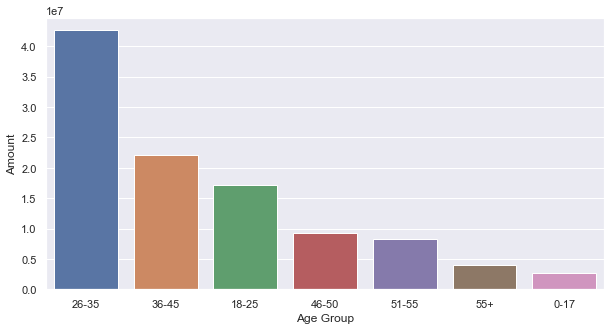

In [70]:
# Total Amount vs Age Group
sales_gen = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_gen)

*From the above graph we can see that most of the buyers are of age group between 26-35 yrs female*

## State

<AxesSubplot:xlabel='State', ylabel='Orders'>

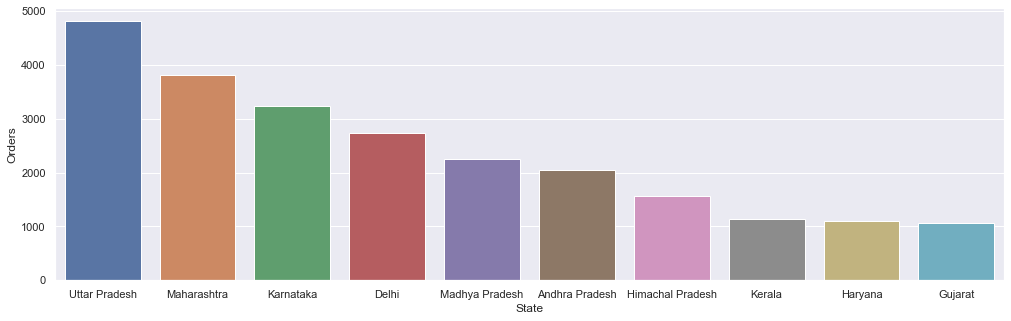

In [80]:
# Total number of orders from top 10 states
sales_sta = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_sta)

<AxesSubplot:xlabel='State', ylabel='Amount'>

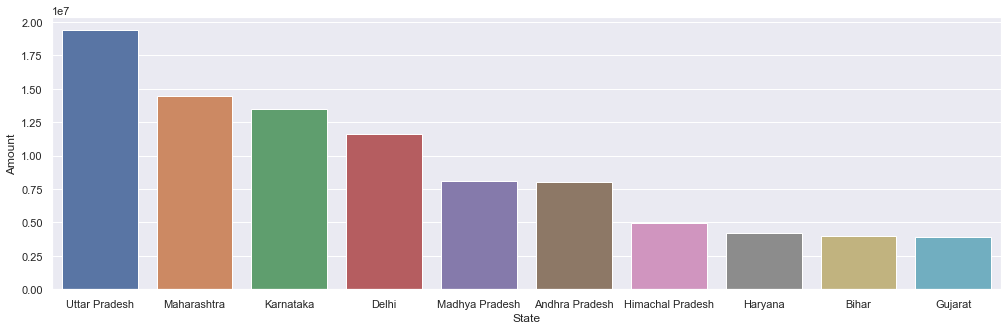

In [79]:
# Total Amount/sale from top 10 states
sales_sta = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_sta)

*From the above graphs we can see that most of the orders and also total sales amount are from UP, Maharashtra and karnataka*

## Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

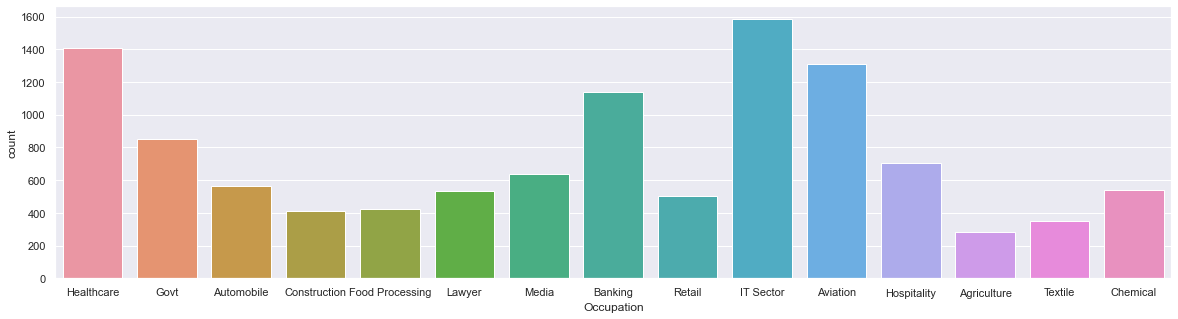

In [87]:
#Number of Orders by Occupation
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x = 'Occupation', data = df)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

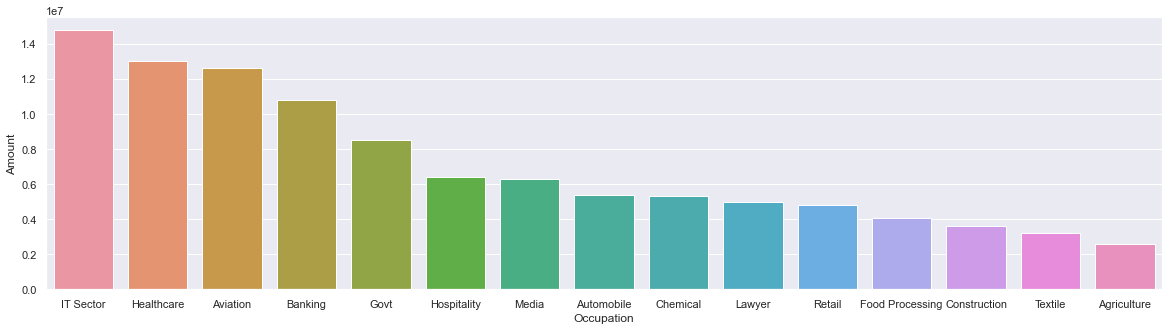

In [88]:
#Total amount spent by Occupation
sales_occ = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occ)

*From above graphs we see that most of the buyers are working in IT, Healthcare and Aviation*

## Product Category

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

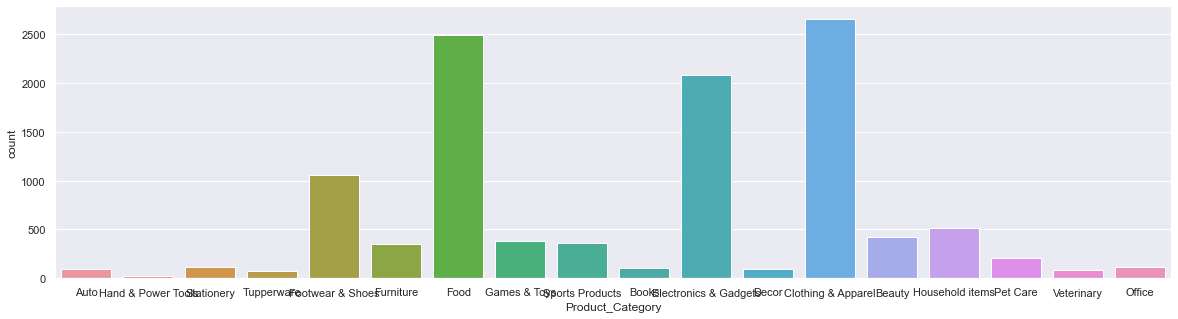

In [92]:
#Number of orders by product category
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x = 'Product_Category', data = df)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

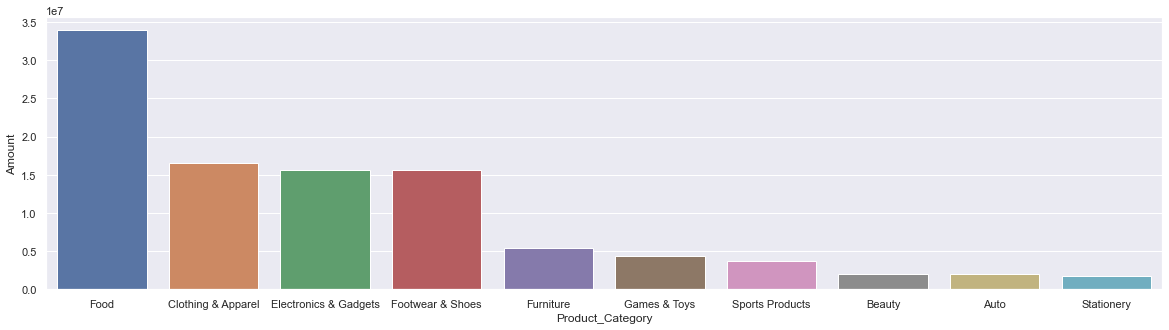

In [94]:
#Total amount spent on product categories
sales_occ = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_occ)

*From the above graph most of the sold products are from Food, Clothing and Electronics*

## Conclusion

### Female of Age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Helathcare and Aviation are more likely to buy products from Food, Clothing and Electronic category